In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from tqdm import tqdm
from const_mesolve import const_mesolve

In [2]:
def ThreeLevel(t, delta, Omega=2*np.pi*10, Gamma=2*np.pi*40, Delta=2*np.pi*1000, w_01=2*np.pi*10, tSample=1501):
    M = np.array([[-delta/2, 0, Omega], [0, delta/2, Omega], [Omega, Omega, Delta]])
    H = Qobj(M)
    M_02 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]])
    M_12 = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])
    c_ops = [np.sqrt(Gamma)*Qobj(M_02), np.sqrt(Gamma)*Qobj(M_12)]
    
    init = fock(3, 0)
    result = const_mesolve(H, init, np.linspace(0, t, tSample), c_ops, fock_dm(3, 0)).expect
    
    return np.linspace(0, t, tSample), result[0]

(-0.05, 1.05)

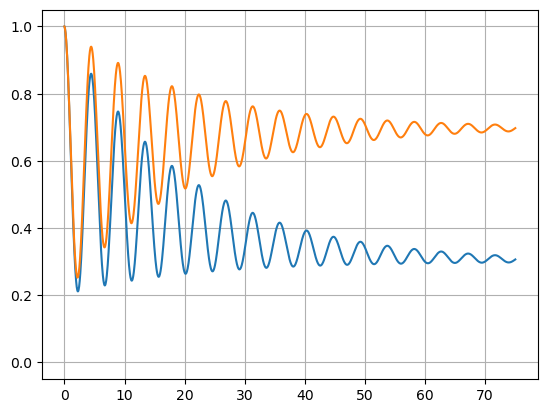

In [3]:
test = ThreeLevel(t=75, delta=2*np.pi*0.1)
test2 = ThreeLevel(t=75, delta=-2*np.pi*0.1)
plt.plot(test[0], test[1])
plt.plot(test2[0], test2[1])
plt.grid()
plt.ylim([-.05, 1.05])
# test[1][-1]

100%|███████████████████████████████████████████████████████| 6/6 [00:19<00:00,  3.20s/it]


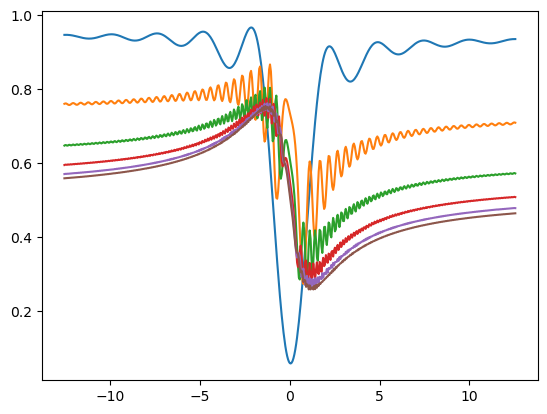

In [4]:
delta_list = 2*np.pi*np.linspace(-2, 2, 501)
for j in tqdm(np.array([2.5, 15, 30, 45, 60, 75])):
    P_det = np.array([ThreeLevel(j, i, tSample=2)[1][-1] for i in (delta_list)])
    plt.plot(delta_list, P_det, label=f't={j}')

In [5]:
# plt.legend()

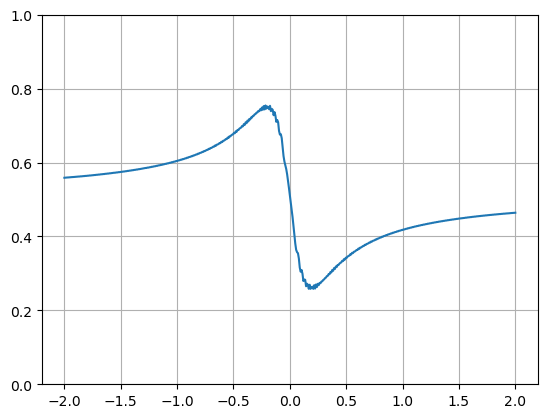

In [6]:
plt.plot(delta_list/2/np.pi, P_det)
plt.ylim([0, 1])
plt.grid()
# P_det